In [532]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [533]:
df = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

# EDA

In [534]:
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [535]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [536]:
df['Timestamp'][0].strftime(format='%d-%m-%Y')

'07-07-2015'

In [537]:
df['Timestamp'] = [df['Timestamp'][i].strftime(format='%d-%m-%Y') for i in range(len(df))]

#### Note: Drop the Date for the ML or make it "before Pandemic" and "during Pandemic" 

In [538]:
df.columns = df.columns.str.lower()

In [539]:
#df.to_csv('wellbeing_lifestyle_data.csv')

In [540]:
df.dtypes

timestamp                   object
fruits_veggies               int64
daily_stress                object
places_visited               int64
core_circle                  int64
supporting_others            int64
social_network               int64
achievement                  int64
donation                     int64
bmi_range                    int64
todo_completed               int64
flow                         int64
daily_steps                  int64
live_vision                  int64
sleep_hours                  int64
lost_vacation                int64
daily_shouting               int64
sufficient_income            int64
personal_awards              int64
time_for_passion             int64
weekly_meditation            int64
age                         object
gender                      object
work_life_balance_score    float64
dtype: object

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                15972 non-null  object 
 1   fruits_veggies           15972 non-null  int64  
 2   daily_stress             15972 non-null  object 
 3   places_visited           15972 non-null  int64  
 4   core_circle              15972 non-null  int64  
 5   supporting_others        15972 non-null  int64  
 6   social_network           15972 non-null  int64  
 7   achievement              15972 non-null  int64  
 8   donation                 15972 non-null  int64  
 9   bmi_range                15972 non-null  int64  
 10  todo_completed           15972 non-null  int64  
 11  flow                     15972 non-null  int64  
 12  daily_steps              15972 non-null  int64  
 13  live_vision              15972 non-null  int64  
 14  sleep_hours           

In [542]:
df['age'].value_counts()

21 to 35        6108
36 to 50        4655
51 or more      3390
Less than 20    1819
Name: age, dtype: int64

In [543]:
df['gender'].value_counts()

Female    9858
Male      6114
Name: gender, dtype: int64

In [544]:
df['daily_stress'].value_counts()

3         4398
2         3407
4         2960
1         2478
5         2052
0          676
1/1/00       1
Name: daily_stress, dtype: int64

#### Note: Delete the row for false value '1/1/00' in daily_stress

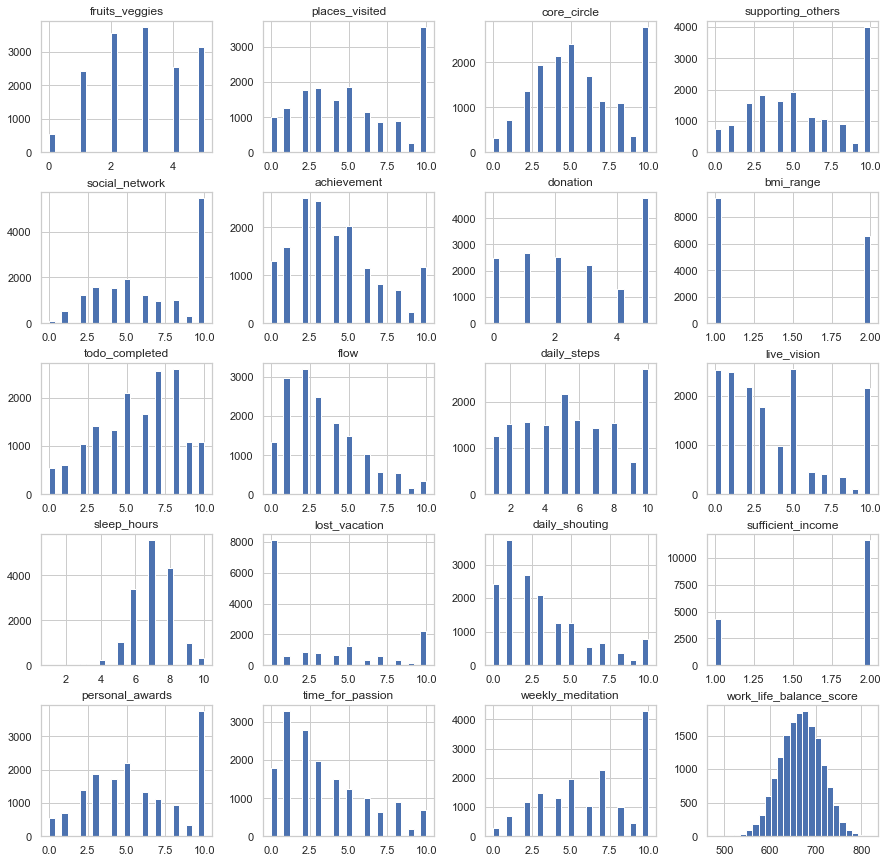

In [545]:
df.hist(bins=25,figsize=(15, 15), layout=(5, 4));
plt.show()

### Histograms categorical columns

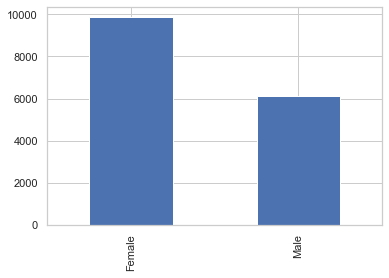

In [546]:
df.gender.value_counts().plot(kind='bar');

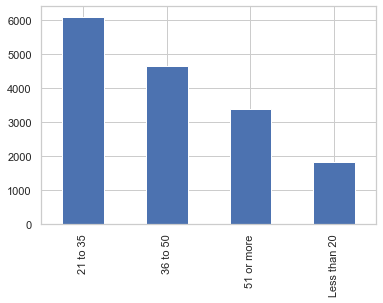

In [547]:
df.age.value_counts().plot(kind='bar');

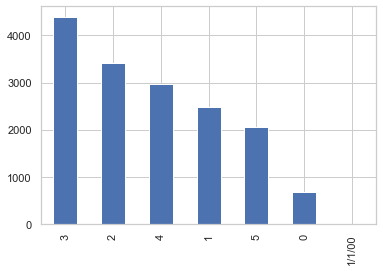

In [548]:
df.daily_stress.value_counts().plot(kind='bar');

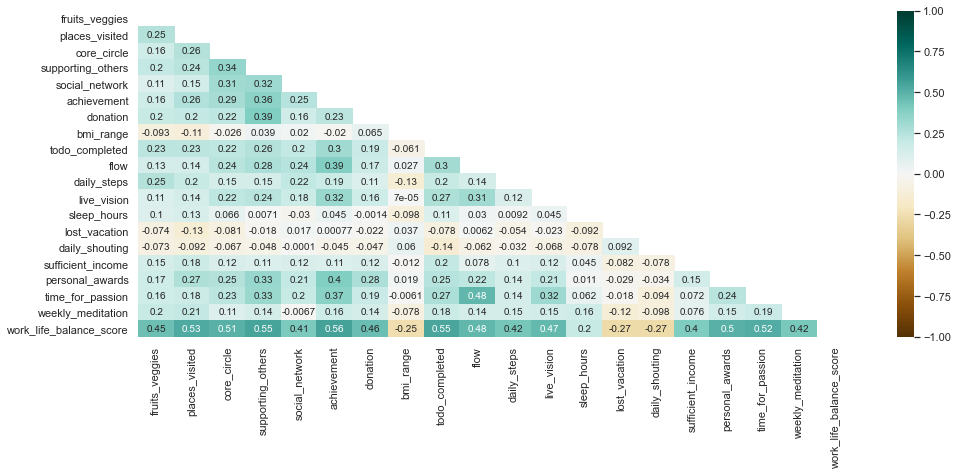

In [549]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

### The highest correlations occur between the work_life_balance_score with other features. The reason is that this feature is the result of the survey. After participants filled out the survey, they get their work_life_balance_score in an email. There is no insight into the calculation of the work_life_balance_score. The work_life_balance_score has a different scale than other features. The feature could be dropped or used as a comparison to the ML model result. 
### Furthermore it is visible that the highest correlations occur within similar features, e.g. donation and supporting_others 39%. 
### Time for passion (later categorised in meaning) and flow (achievement) have a correlation of 48%.<br> In order to gain a better overview of features and being able to make conclusions, the 20 features should be categorised in smaller categories.

# Data Cleaning

In [550]:
df.loc[df['daily_stress'] == '1/1/00']

,timestamp,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,...,sleep_hours,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation,age,gender,work_life_balance_score
10005,18-12-2018,3,1/1/00,1,2,10,10,5,5,2,...,6,10,1,2,10,8,2,21 to 35,Male,682.6


In [551]:
df= df.drop([10005]).reset_index(drop=True)

In [552]:
df['daily_stress']=df['daily_stress'].astype(int)

In [553]:
len(df)

15971

# 3. Pre-processing 

## Sort the date to before pandemic and during pandemic

In [554]:
# Covid-19 was declared a pandemic on 11 March 2020
import datetime
p=datetime.date(2020, 3, 10)

In [555]:
p= pd.to_datetime(p)

In [556]:
df['date'] = pd.to_datetime(df['timestamp'],format='%d-%m-%Y')

In [557]:
df.tail()

,timestamp,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,...,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation,age,gender,work_life_balance_score,date
15966,14-03-2021,3,3,0,4,0,10,0,4,2,...,0,1,1,5,2,5,51 or more,Female,644.5,2021-03-14
15967,14-03-2021,3,3,6,8,7,4,6,3,1,...,0,0,2,10,5,8,21 to 35,Female,714.9,2021-03-14
15968,14-03-2021,4,3,0,10,10,8,6,5,1,...,0,1,2,10,1,10,21 to 35,Male,716.6,2021-03-14
15969,14-03-2021,1,1,10,8,2,7,3,2,1,...,7,2,2,1,6,8,21 to 35,Female,682.0,2021-03-14
15970,14-03-2021,5,4,0,2,10,10,5,1,2,...,5,2,2,1,8,4,21 to 35,Female,651.4,2021-03-14


In [558]:
df['pandemic'] = [df['date'][i]>p for i in range(len(df))]

In [559]:
df['pandemic'].value_counts()

False    12852
True      3119
Name: pandemic, dtype: int64

In [560]:
#Turn pandemic boolean into 1 and 0 
df['pandemic']= df['pandemic']*1

In [561]:
#df.to_csv('wellbeing_pandemic.csv')

#### The impacts of the pandemic have been investigated in Tableau.

## Prepare Age and Gender for Machine Learning

In [562]:
aged = {'Less than 20' : 1, '21 to 35' : 2, '36 to 50' : 3, '51 or more' : 4}
df['age'] =[aged[x] for x in df.age]


In [563]:
gendered = {'Female' : 1, 'Male' : 0}
df['gender'] = [gendered[x] for x in df.gender]

## 5 Categories of each 4 features 

Score per category: low (1), medium (2) or high (3)
<br>e.g. a person has the result of: 
* body medium 
* mind low 
* achievement high 
* connection medium 
* meaning medium

#### Calculation Method
First the category score, e.g. body score is calculated by the sum of the answers of each of the 4 features. <br>Per feature the score is 1, 2 or 3, so that the sum will be between 4 (lowest) and 12 (highest).
<br>Afterwards the body score gets ordered into low (4-6), medium (7-9) or high (10-12).
<br>The same method is applied for the other 4 categories.

1. Healthy body - reflecting your physical well-being and healthy habits
* fruits_veggies 0, 1, 2, 3, 4, 5 or more servings per day
* bmi_range 1 (below 25) 2 (more than 25: overweight)
* daily_steps 1.000 to 10.000 (in 1k steps) 
* sleep_hours per night 1h to 10h (in 1h steps) 

In [564]:
df['body_score'] = df['fruits_veggies'].map({0 : 1, 1 : 1, 2 : 2, 3:2, 4:3, 5:3})+ df['bmi_range'].map({2 :1, 1 : 3})+df['daily_steps'].map({1:1, 2:1, 3:1, 4:1, 5:2, 6:2, 7:2, 8:3, 9:3, 10:3})+df['sleep_hours'].map({1:1,2:1,3:1,4:1,5:2,6:2,10:2, 7:3,8:3,9:3})

In [565]:
df['body'] = df['body_score'].map({4 : 1, 5 : 1, 6 : 1, 7:2, 8:2, 9:2, 10:3, 11:3, 12:3})

2. Healthy mind - indicating how well you embrace positive emotions
* sufficient_income
* daily_stress
* daily_shouting
* weekly_meditation

In [566]:
df['mind_score']=df['sufficient_income'].map({1:1, 2:3})+df['daily_shouting'].map({0:3,1:3,2:3,3:3,4:2,5:2,6:2,7:1,8:1,9:1,10:1})+df['daily_stress'].map({0:3,1:3,2:2,3:2,4:1,5:1})+df['weekly_meditation'].map({0:1,1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:3})

In [567]:
df['mind'] = df['mind_score'].map({4 : 1, 5 : 1, 6 : 1, 7:2, 8:2, 9:2, 10:3, 11:3, 12:3})

3. Expertise, measuring the ability to grow your expertise and achieve something unique;
* personal_awards
* todo_completed
* achievement
* flow

In [568]:
df['achieve_score']=df['personal_awards'].map({0:1,1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:3})+df['todo_completed'].map({0:1,1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:3})+df['achievement'].map({0:1,1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:3})+df['flow'].map({0:1,1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:3})

In [569]:
df['achieve'] = df['achieve_score'].map({4 : 1, 5 : 1, 6 : 1, 7:2, 8:2, 9:2, 10:3, 11:3, 12:3})

4. Connection, assessing the strength of your network and your inclination to discover the world;
* core_circle
* lost_vacation
* social_network
* places_visited

In [570]:
df['connection_score']=df['core_circle'].map({0:1,1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:3})+df['lost_vacation'].map({0:3,1:3,2:3,3:3,4:2,5:2,6:2,7:1,8:1,9:1,10:1})+df['social_network'].map({0:1,1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:3})+df['places_visited'].map({0:1,1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:3})

In [571]:
df['connection'] = df['connection_score'].map({4 : 1, 5 : 1, 6 : 1, 7:2, 8:2, 9:2, 10:3, 11:3, 12:3})

5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream’.
* donation
* live_vision
* supporting_others
* time_for_passion

In [572]:
df['meaning_score']=df['donation'].map({0:1,1:1,2:2,3:2,4:3,5:3})+df['live_vision'].map({0:1,1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:3})+df['supporting_others'].map({0:1,1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:3})+df['time_for_passion'].map({0:1,1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:3})

In [573]:
df['meaning'] = df['meaning_score'].map({4 : 1, 5 : 1, 6 : 1, 7:2, 8:2, 9:2, 10:3, 11:3, 12:3})

In [574]:
scored = df.filter(['body','mind','achieve','connection','meaning','gender','age'])

In [575]:
#scored.to_csv('scored_df.csv')

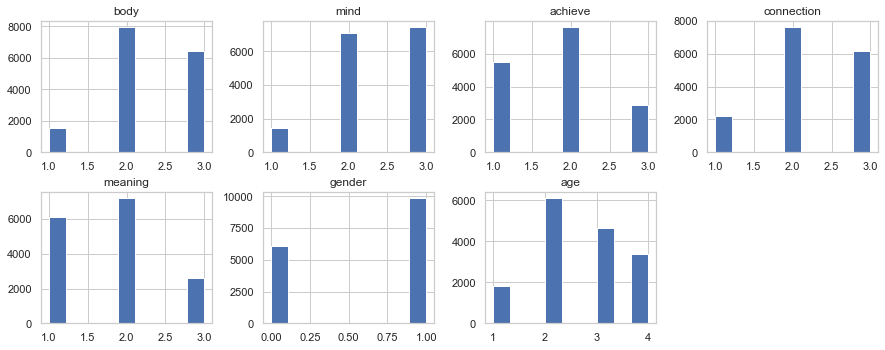

In [576]:
scored.hist(bins=9,figsize=(15, 15), layout=(5, 4));
plt.show()

### Heatmap with the 5 categories

In [577]:
cats = df.filter(['body','mind','achieve','connection','meaning'])

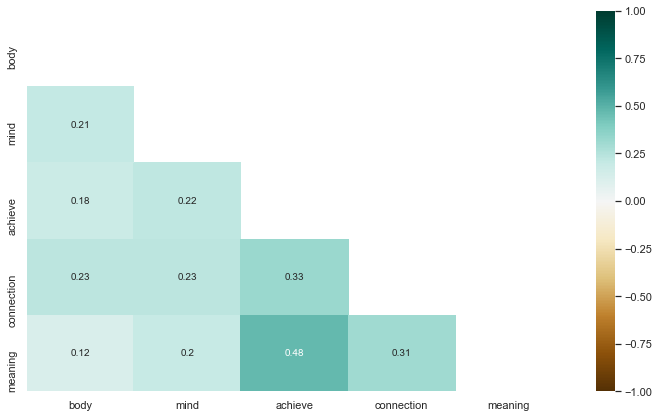

In [578]:
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
mask = np.triu(np.ones_like(cats.corr(), dtype=np.bool))
heatmap = sns.heatmap(cats.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

* The highest correlations are: achievement + meaning 48% , connection + achievement 33%, connection + meaning 31%
* Interesting that body + mind has only a correlation of 21%

## Random Forest Classifier

In [579]:
scored.head()

,body,mind,achieve,connection,meaning,gender,age
0,3,2,2,2,1,1,3
1,2,3,1,2,2,1,3
2,2,2,1,2,2,1,3
3,2,1,1,2,2,1,4
4,2,3,2,2,2,1,4


In [580]:
# Split dataset into features and target
X = scored.drop('achieve', axis=1)
y=scored['achieve']

In [581]:
# View count of each class
y.value_counts()

2    7618
1    5490
3    2863
Name: achieve, dtype: int64

In [582]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [583]:
# Instantiate and fit the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [584]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

In [585]:
# View accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred_test)

0.5697470573503631

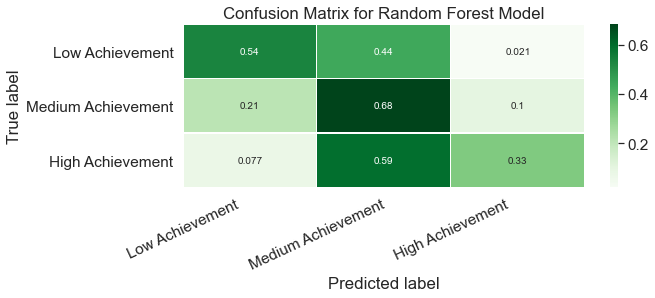

In [589]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test,y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(9,3))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Low Achievement', 'Medium Achievement', 'High Achievement']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### The model false predicted medium achievers often, probably because the sample size of medium achievers is the biggest. 

In [592]:
# View the classification report for test data and predictions
print(classification_report(y_test,y_pred_test ))

              precision    recall  f1-score   support

           1       0.61      0.54      0.57      1372
           2       0.56      0.68      0.61      1905
           3       0.51      0.33      0.40       716

    accuracy                           0.57      3993
   macro avg       0.56      0.52      0.53      3993
weighted avg       0.57      0.57      0.56      3993



### The results are not so good. Out of all true high achievers only 33% were predicted correctly (Recall). <br>Only 51% of the high achievers that were predicted are actually high achievers (Precision).

# Logistic Regression

### The model predicts the high achievers (3) from the wellbeing category achievement <br>by the other 4 categories

In [601]:
# import sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [603]:
## prepare variables
X = scored[['body','mind','connection','meaning']]
y = (scored.achieve == 3).astype(int)

### Model before sampling

In [604]:
y.value_counts()

0    13108
1     2863
Name: achieve, dtype: int64

#### The highest achievers are  only 18% of the total sample size.

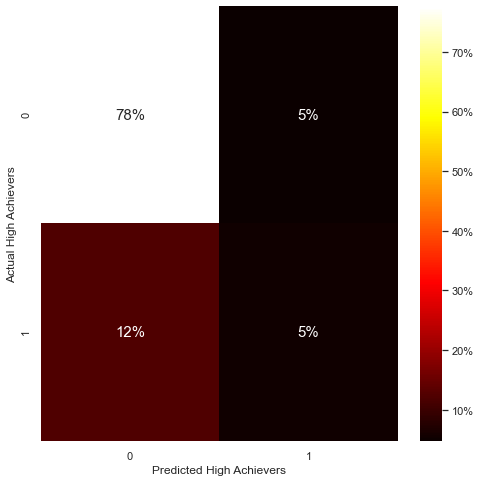

In [605]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# instantiating and training of a LogisticRegression model
model = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_train, y_train)

# creating predictions based on our trained model
y_pred=model.predict(X_test)

# calculating confusion matrix
cnfmat = confusion_matrix(y_test,y_pred)

# creating a Dataframe out of our confusion matrix. Makes it more comfortable to plot in seaborn
df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test), index = np.unique(y_test))

# assinging column and index names to our df
df_cm.index.name = 'Actual High Achievers'
df_cm.columns.name = 'Predicted High Achievers'

# set the fontsize for my plot
sns.set(font_scale=1)

# this funcformatter is necessary to create a custom function which formats our values as % later
from matplotlib.ticker import FuncFormatter
fmt = lambda x,pos: '{:.0%}'.format(x)

# set plot size
fig, ax = plt.subplots(figsize=(8,8))

# plot the heatmap for our confusion matrix
sns.heatmap(df_cm/df_cm.sum().sum(),  # plot the number of values as percentage of all values in the confusion matrix
            annot=True,
            fmt='.0%',
            cmap='hot',
            annot_kws={"size":15},
            cbar_kws={'format': FuncFormatter(fmt)}
           );

In [608]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
target_names = ['Low & Medium Achievers', 'High Achievers']
print(classification_report(y_test,y_pred,target_names=target_names))

                        precision    recall  f1-score   support

Low & Medium Achievers       0.86      0.94      0.90      3947
        High Achievers       0.54      0.31      0.39       845

              accuracy                           0.83      4792
             macro avg       0.70      0.63      0.65      4792
          weighted avg       0.81      0.83      0.81      4792



#### Recall: Out of all true high achievers only 31% were predicted correctly.  <br>Precision: 54% of the high achievers we have predicted are actually high achievers. <br>The accuracy score is 83%, but accuracy is not a great measure of classifier performance when the classes are imbalanced.

### Applying TOMEK to downsample the majority class of the label

In [610]:
from imblearn.under_sampling import TomekLinks

In [611]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

0    13108
1     2863
Name: achieve, dtype: int64

#### The sample size did not change, so the result would not change.

### SMOTE - oversample the minority class of the target label

In [612]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [613]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    13108
1    13108
Name: achieve, dtype: int64

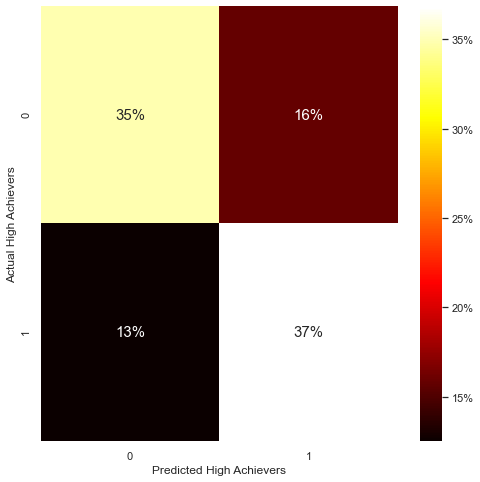

In [616]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

model = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_train, y_train)

y_pred=model.predict(X_test)
cnfmat = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test), index = np.unique(y_test))


df_cm.index.name = 'Actual High Achievers'
df_cm.columns.name = 'Predicted High Achievers'

sns.set(font_scale=1)

from matplotlib.ticker import FuncFormatter
fmt = lambda x,pos: '{:.0%}'.format(x)

# set plot size
fig, ax = plt.subplots(figsize=(8,8))

# plot the heatmap
sns.heatmap(df_cm/df_cm.sum().sum(),  # plot the number of values as percentage of all values in the confusion matrix        
    annot=True,
            fmt='.0%',
            cmap='hot',
            annot_kws={"size":15},
            cbar_kws={'format': FuncFormatter(fmt)}
           );

In [617]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
target_names = ['Low & Medium Achievers', 'High Achievers']
print(classification_report(y_test,y_pred,target_names=target_names))

                        precision    recall  f1-score   support

Low & Medium Achievers       0.74      0.69      0.71      3983
        High Achievers       0.70      0.75      0.72      3882

              accuracy                           0.72      7865
             macro avg       0.72      0.72      0.72      7865
          weighted avg       0.72      0.72      0.72      7865



#### SMOTE has improved the results a lot.  Recall: Out of all true high achievers 75% were predicted correctly.  <br>Precision: 70% of the high achievers we have predicted are actually high achievers. The accuracy score is 72%.